# CRAG-ReAct: Intelligent Retrieval & Reasoning
## Robust Retrieval-Augmented Generation with Step-by-Step Reasoning

Welcome to this Jupyter notebook exploring cutting-edge techniques in artificial intelligence. We'll be diving into a powerful combination of two advanced approaches:

1. **Corrective Retrieval Augmented Generation (CRAG)**
2. **Reasoning+Acting (ReAct)**


Let's get started!

<small>

**SOURCES:**

[The paper](https://arxiv.org/abs/2210.03629) introduces ReAct, an approach that combines reasoning traces and task-specific actions in large language models (LLMs) to enhance their problem-solving capabilities. ReAct demonstrates improved performance, interpretability, and trustworthiness across various tasks, including question answering, fact verification, and interactive decision making, by allowing LLMs to generate reasoning steps and actions in an interleaved manner while interacting with external sources.


[The Corrective Retrieval Augmented Generation (CRAG)](https://arxiv.org/abs/2401.15884) is a proposed approach to improve the robustness of language model generation by incorporating a lightweight retrieval evaluator, large-scale web searches, and a decompose-then-recompose algorithm for retrieved documents. CRAG aims to enhance the performance of RAG-based approaches by assessing retrieval quality, augmenting results with web searches when necessary, and selectively focusing on key information while filtering out irrelevant content.
</small>


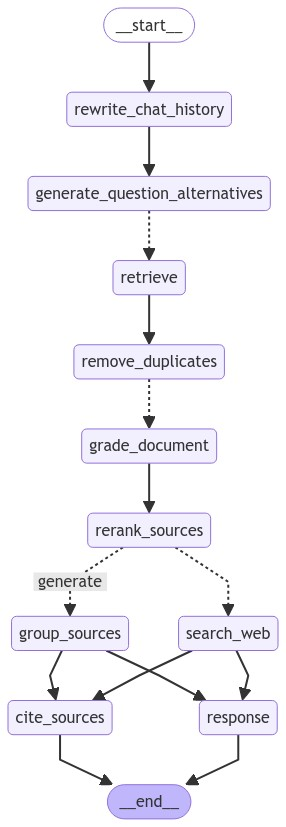

/Users/ben/GitHub/vectrix/.venv/lib/python3.12/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: This API is in beta and may change in the future.
  warn_beta(
2024-08-20 10:19:06,151 - root - INFO - No chat history, using original question
2024-08-20 10:19:06,151 - root - INFO - No chat history, using original question


{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'f1e09647-01a0-445d-bd09-f5592962d00b', 'graph_node': '__start__', 'data': 'Processing __start__...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'd07b584c-95e7-4e49-9de6-3c6c1b2e826a', 'graph_node': 'rewrite_chat_history', 'data': 'Processing rewrite_chat_history...'}
Appending question to messages
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '5829b00c-6005-4e50-899d-2d251120691e', 'graph_node': 'generate_question_alternatives', 'data': 'Processing generate_question_alternatives...'}


2024-08-20 10:19:06,744 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:06,744 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:07,067 - root - INFO - Question list: ['Who is Marijke Wouters?', 'Can you tell me about Marijke Wouters?', 'What can you share regarding Marijke Wouters?']
2024-08-20 10:19:07,067 - root - INFO - Question list: ['Who is Marijke Wouters?', 'Can you tell me about Marijke Wouters?', 'What can you share regarding Marijke Wouters?']


{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'd3e7810b-ffca-42f7-8b15-199666528ada', 'graph_node': 'retrieve', 'data': 'Processing retrieve...'}


2024-08-20 10:19:12,340 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:12,340 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:12,593 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:12,593 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:12,854 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:12,854 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:13,122 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:13,122 - httpx - INFO - HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
2024-08-20 10:19:13,187 - root - INFO - Retrieved 3 documents
2024-08-20 10:19:13,187 - root - INFO - Retrieved 3 docume

{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '9ddf2b7c-aed4-413a-bee8-03c1f26a8ba9', 'graph_node': 'remove_duplicates', 'data': 'Processing remove_duplicates...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'bd9e3565-1411-4f51-92e1-56d8833e7747', 'graph_node': 'grade_document', 'data': 'Processing grade_document...'}


2024-08-20 10:19:13,877 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:13,877 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:13,968 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:13,968 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:13,973 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:13,973 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:14,018 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:14,018 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:14,178 - httpx 

{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '8f429029-f605-4c52-88b1-07dc5b57463f', 'graph_node': 'rerank_sources', 'data': 'Processing rerank_sources...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'c98a0361-c240-4871-a740-384d65d3cd97', 'graph_node': 'group_sources', 'data': 'Processing group_sources...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '4d42659e-9db5-4e7b-bca3-3ff3bfddbbc1', 'graph_node': 'response', 'data': 'Processing response...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '15c7f5eb-6dbf-4e59-aaba-35e19e276852', 'graph_node': 'cite_sources', 'data': 'Processing cite_sources...'}


2024-08-20 10:19:15,468 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:15,468 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'type': 'stream', 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'run_id': '3ef25a16-d4cb-4365-9daa-046fdf992342', 'graph_node': 'response', 'data': ''}
{'type': 'stream', 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'run_id': '3ef25a16-d4cb-4365-9daa-046fdf992342', 'graph_node': 'response', 'data': 'Mar'}
{'type': 'stream', 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'run_id': '3ef25a16-d4cb-4365-9daa-046fdf992342', 'graph_node': 'response', 'data': 'ijke'}
{'type': 'stream', 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'run_id': '3ef25a16-d4cb-4365-9daa-046fdf992342', 'graph_node': 'response', 'data': ' W'}
{'type': 'stream', 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'run_id': '3ef25a16-d4cb-4365-9daa-046fdf992342', 'graph_node': 'response', 'data': 'ou'}
{'type': 'stream', 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'run_id': '3ef25a16-d4cb-4365-9daa-046fdf992342', 'graph_node': 'response', 'data': 'ters'}
{

2024-08-20 10:19:24,261 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-08-20 10:19:24,261 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'type': 'final_output', 'model_provider': '', 'model_name': '', 'run_id': '15c7f5eb-6dbf-4e59-aaba-35e19e276852', 'graph_node': 'cite_sources', 'data': [{'source': 'WAT GEEFT JOU ENERGIE? JOU ENERGIE? Marijke Wouters Sales manager Het leven is te kort om iets tegen je zin te doen. Dus, doe alles met passie, of doe het helemaal niet! Met die gedrevenheid ondersteunen onze consultants jouw projecten zodat je business value elke dag vergroot! Neem contact op', 'url': 'https://elmos.be/vind-it-talent'}, {'source': 'Marijke Wouters CEO Elmos en ElmosData marijke.wouters @ elmos.be 0494 34 35 09', 'url': 'https://elmos.be/over-ons/het-team-van-elmos-it-consultancy'}, {'source': 'Marijke Wouters, voormalig Sales Manager, neemt het roer als CEO van Elmos over van Liesbeth Debruyn. Marijke is vastbesloten om Elmos verder uit te bouwen als een vooraanstaand kennisbedrijf binnen IT. Vanaf 1 juni neemt Liesbeth de functie van CEO van ElmosGroup op zich. In 2010 kwam Liesbeth Debruyn aan boord als

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
from IPython.display import Image, display
from langchain_core.messages import HumanMessage
import uuid
from vectrix.graphs.vectrix_advanced import Graph
from vectrix.streaming.processor import StreamProcessor
from langsmith import Client



# Hide the rescources warning
import warnings
warnings.simplefilter("ignore", ResourceWarning)

os.environ["LANGCHAIN_TRACING_V2"] = "true"


# Instatiate the graph 
demo_graph = Graph(project='Elmos', search_internet=True)
graph = demo_graph.create_graph()

# Display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

# Set the input message<
input = HumanMessage(content="Who is Marijke Wouters ?")

# Instanitate the stream processor
stream_processor = StreamProcessor()

# Run the stream and print the chunks
async for chunk in stream_processor.process_stream(graph, input, messages=[]):
    print(chunk)